$~$

# IT Academy - Data Science Itinerary



$~$

## S06 T01: Data, Probability & Statistics
___


In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import kaggle
from scipy import stats
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import pingouin as pg

$~$
___
####  Exercise 1

$~$

Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the mode, the median, the standard deviation, and the arithmetic mean.

$~$
___

$~$

#####  finding a dataset

$~$

Let's find a dataset in Kaggle. Using de following line, we can search for "sports" datasets

$~$

In [2]:
!kaggle datasets list -s "sports"

ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpiosenka/sports-classification                            100 Sports Image Classification                 477MB  2022-01-13 16:08:31           1281         44  0.8235294        
the-guardian/olympic-games                                 Olympic Sports and Medals, 1896-2014            483KB  2017-01-24 15:05:37          23152        209  0.7058824        
ekrembayar/fifa-21-complete-player-dataset                 FIFA 21 COMPLETE PLAYER DATASET                   3MB  2020-10-05 06:21:30           2473         62  0.8235294        
parulpandey/forbes-highest-paid-athletes-19902019          Forbes Highest Paid Athletes 1990-2020        

for this exercice we are going to use [Forbes Highest Paid Athletes 1990-2020](https://www.kaggle.com/parulpandey/forbes-highest-paid-athletes-19902019) from Kaggle. 

$~$

"parulpandey/forbes-highest-paid-athletes-19902019" 

$~$

#####  downloading a dataset from kaggle

$~$

We use the following code to download the dataset from kagggle:

$~$

In [3]:
PATH = "./data"

if not os.path.exists(PATH):
    os.makedirs(PATH)
if not os.listdir(PATH):
        !kaggle datasets download -d "parulpandey/forbes-highest-paid-athletes-19902019" --unzip -p $PATH  

  0%|                                               | 0.00/4.26k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.26k/4.26k [00:00<00:00, 3.13MB/s]


In [4]:
files = [os.path.join(PATH,f) for f in os.listdir(PATH)]

for f in files:
    print(f)

./data/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv


$~$

#####  reading and getting information from the dataset

$~$

Let's see some few general information of our dataset

$~$

In [5]:
df = pd.read_csv(files[0])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [7]:
df.shape

(301, 8)

In [8]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [9]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


$~$

let's group our dataset by "Sports" and then we will work with this information


$~$

In [10]:
df["Sport"].describe()

count            301
unique            29
top       Basketball
freq              54
Name: Sport, dtype: object

In [11]:
df["Sport"].value_counts(sort=True)

Basketball                      54
Boxing                          29
basketball                      27
Golf                            24
Soccer                          22
golf                            20
Tennis                          18
boxing                          17
American Football               17
soccer                          11
Auto Racing                     10
F1 racing                        8
auto racing                      7
tennis                           5
F1 Motorsports                   5
motorcycle gp                    4
NFL                              3
Baseball                         3
NASCAR                           3
baseball                         3
Ice Hockey                       2
Auto Racing (Nascar)             2
cycling                          1
American Football / Baseball     1
Hockey                           1
ice hockey                       1
NBA                              1
Auto racing                      1
MMA                 

$~$

now we can answer the initial question using the following line of code



$~$

In [12]:
#the mode, the median, the standard deviation, and the arithmetic mean.
df.pivot_table(values="earnings ($ million)",\
               index="Sport",aggfunc=["count",\
                                      stats.mode,  statistics.mode,np.median,"std","mean"])

count                 mode  \
                             earnings ($ million) earnings ($ million)   
Sport                                                                    
American Football                              17        ([29.0], [1])   
American Football / Baseball                    1        ([22.5], [1])   
Auto Racing                                    10        ([11.3], [1])   
Auto Racing (Nascar)                            2        ([20.0], [1])   
Auto racing                                     1        ([18.5], [1])   
Baseball                                        3        ([12.7], [1])   
Basketball                                     54        ([24.0], [3])   
Boxing                                         29        ([23.0], [3])   
F1 Motorsports                                  5        ([33.0], [1])   
F1 racing                                       8        ([34.0], [1])   
Golf                                           24         ([9.2], [1])   
Hockey                                          1        ([17.9], [1])   
Ice Hockey                                      2        ([13.5], [1])   
MMA                                             1        ([99.0], [1])   
NASCAR                                          3        ([19.1], [1])   
NBA                                             1        ([15.2], [1])   
NFL                                             3         ([9.5], [1])   
Soccer                                         22        ([80.0], [2])   
Tennis                                         18         ([8.5], [1])   
auto racing                                     7         ([9.0], [2])   
baseball                                        3        ([26.2], [1])   
basketball                                     27        ([45.0], [3])   
boxing                                         17        ([40.0], [2])   
cycling                                         1        ([28.0], [1])   
golf                                           20         ([8.5], [2])   
ice hockey                                      1        ([14.5], [1])   
motorcycle gp                                   4        ([35.0], [2])   
soccer                                         11        ([28.0], [1])   
tennis                                          5        ([16.0], [1])   

                                                                median  \
                             earnings ($ million) earnings ($ million)   
Sport                                                                    
American Football                            42.0                50.00   
American Football / Baseball                 22.5                22.50   
Auto Racing                                  22.0                21.00   
Auto Racing (Nascar)                         24.5                22.25   
Auto racing                                  18.5                18.50   
Baseball                                     12.7                17.20   
Basketball                                   24.0                43.30   
Boxing                                       23.0                30.00   
F1 Motorsports                               33.0                38.00   
F1 racing                                    80.0                44.50   
Golf                                         11.1                50.30   
Hockey                                       17.9                17.90   
Ice Hockey                                   13.5                21.65   
MMA                                          99.0                99.00   
NASCAR                                       19.1                24.10   
NBA                                          15.2                15.20   
NFL                                           9.5                11.50   
Soccer                                       80.0                84.70   
Tennis                                       11.0                54.25   
auto racing                                   9


$~$

*Another way to answer the same question would be to do it from a graphic point of view. It is true that it would be a partial answer, however a plot can help us to have an firts initial idea. In this case we use a box plot because it also allows us to visualize the "outliners"*


$~$

see for example "boxing" has very different salaries

$~$


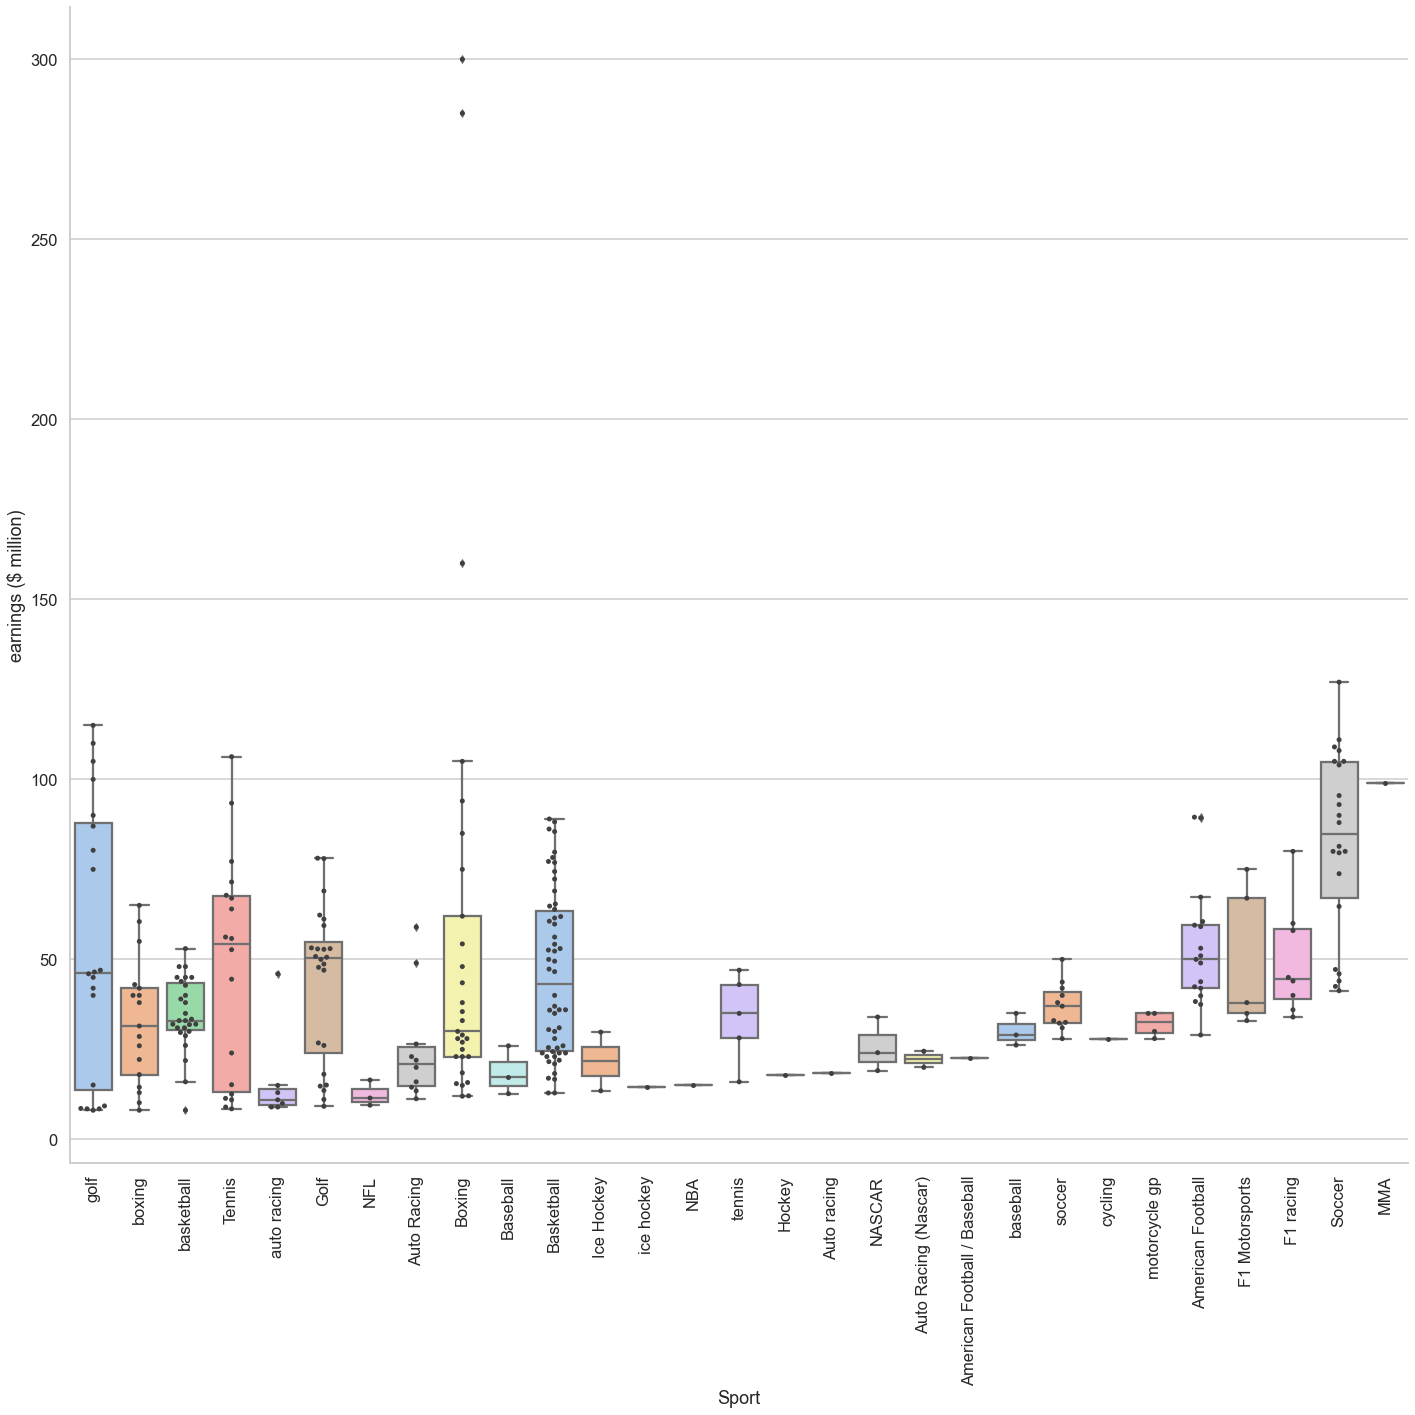

In [13]:
sns.set_context("talk")
sns.set_style("whitegrid")
fig,axes = plt.subplots(1,1, figsize=(20,20))

data = df[["Sport","earnings ($ million)"]]
data = data.sort_values(by='earnings ($ million)')

_ = sns.boxplot(x='Sport', y='earnings ($ million)',
                    data=data, palette="pastel")
_ = sns.swarmplot(x="Sport", y="earnings ($ million)", data=data, color=".25")


_ = plt.xlabel('Sport')
_ = plt.ylabel('earnings ($ million)')

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

$~$
___
####  Exercise 2

$~$

Continuing with the sports topic data, select two attributes and calculate their correlation.

$~$
___

$~$

#####  enlabels

$~$

$~$

First of all we are going to change the labels of our variables, so we can do calculations later. In this case, we will change "Sport" and "Nationality".

$~$

In [14]:
labelencoder1 = LabelEncoder()
df["sport_label"] = labelencoder1.fit_transform(df["Sport"])


In [15]:
labelencoder2 = LabelEncoder()
df["nationality_label"] = labelencoder1.fit_transform(df["Nationality"])

In [16]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),sport_label,nationality_label
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6,22,21
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0,22,21
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0,22,21
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0,19,3
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0,19,8



$~$

#####  graphic approximation

$~$

Once we have the variables with labels, and before making the correlation, we can make a plot that serves as a first approximation. Since if in the plot we do not see any relation, it may not make sense to carry out the correlation.

$~$

Since our dataset does not have many quantitative variables, we are going to try "year" and "earnings ($ million)"

$~$


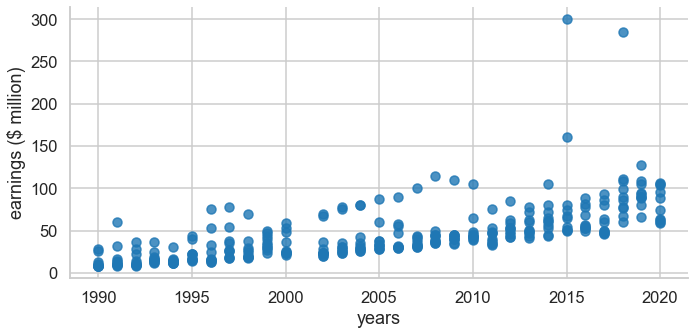

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(x=df["Year"], y=df["earnings ($ million)"], alpha= 0.8)
ax.set_xlabel('years')
ax.set_ylabel('earnings ($ million)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

$~$

in the previous plot we can see there is a small relationship between the two variables

$~$

$~$

#####  correlation calculation

$~$

In the next section, we are going to use two (pingouin and scipy) libraries to do the same correlations:

   + **pearson**: The Pearson product-moment correlation is one of the most commonly used correlations in statistics. It’s a measure of the strength and the direction of a linear relationship between two variables
   + **spearman**: relies on nearly all the same assumptions as the pearson correlation, but it doesn’t rely on normality, and your data can be ordinal as well. Thus, it’s a non-parametric test
   + **kendall**: The Kendall correlation is similar to the spearman correlation in that it is non-parametric. It can be used with ordinal or continuous data. It is a statistic of dependence between two variables.
   
$~$

In [18]:
display(pg.corr(df['Year'], df['earnings ($ million)'], method='pearson'))
display(pg.corr(df['Year'], df['earnings ($ million)'], method='spearman'))
display(pg.corr(df['Year'], df['earnings ($ million)'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,301,0.653866,"[0.58, 0.71]",4.257894e-38,6.856e+34,1.0


,n,r,CI95%,p-val,power
spearman,301,0.818642,"[0.78, 0.85]",5.411202e-74,1.0


,n,r,CI95%,p-val,power
kendall,301,0.664041,"[0.6, 0.72]",5.009719e-64,1.0


In [19]:
r, p = stats.pearsonr(df['Year'], df['earnings ($ million)'])
print(f"Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(df['Year'], df['earnings ($ million)'])
print(f"Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(df['Year'], df['earnings ($ million)'])
print(f"kendall: r={r}, p-value={p}")

Pearson: r=0.6538657412960347, p-value=4.257894079912414e-38
Spearman: r=0.8186422928801158, p-value=5.411201665097849e-74
kendall: r=0.6640410306244006, p-value=5.0097192813037976e-64


$~$

**As we had already seen in the plot, the correlation between the variables is rather low.**
   
$~$

$~$
___
####  Exercise 3

$~$

Continuing with the sports theme data, calculate the correlation of all attributes with each other and represent them in a matrix with different colors of intensity.
$~$
___

$~$

To answer this question, we are going to execute the following line of code:

$~$

In [20]:
df_corr = df.corr(method='pearson')
np.ones_like(df_corr, dtype=bool)
mask = np.triu(np.ones_like(df_corr, dtype=bool))

In [21]:
df_corr

,S.NO,Current Rank,Year,earnings ($ million),sport_label,nationality_label
S.NO,1.000000,0.034739,0.999090,0.641399,-0.050984,-0.074079
Current Rank,0.034739,1.000000,0.001600,-0.449052,-0.049004,0.072329
Year,0.999090,0.001600,1.000000,0.653866,-0.041279,-0.076142
earnings ($ million),0.641399,-0.449052,0.653866,1.000000,-0.059128,-0.083549
sport_label,-0.050984,-0.049004,-0.041279,-0.059128,1.000000,-0.104153
nationality_label,-0.074079,0.072329,-0.076142,-0.083549,-0.104153,1.000000


$~$

as we see in the previous table, our variables are little or not correlated between them.

$~$

to see this better, let's see it in the next plot:

$~$

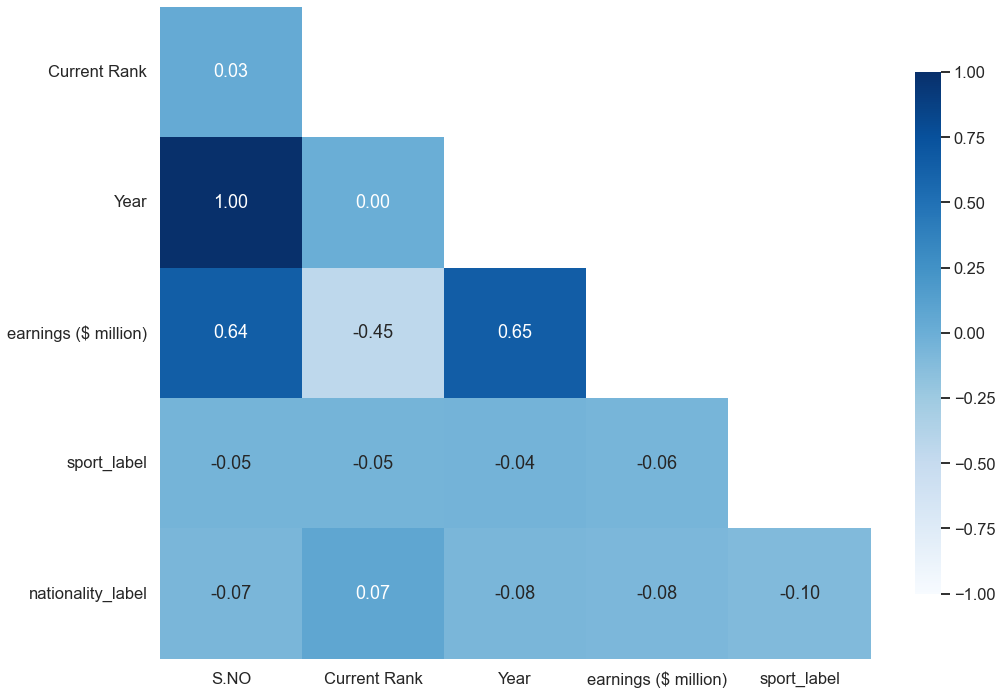

In [22]:
fig, ax = plt.subplots(figsize=(15,10))# mask

mask = np.triu(np.ones_like(df_corr, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

$~$

####  Exercise 4

$~$

Continuing with the sports theme data, select an attribute and calculate the geometric mean and harmonic mean.

$~$
___

$~$

*Before answering the question, let's make it clear what each of the "means" means:*
for it here were are folling this [post](https://machinelearningmastery.com/arithmetic-geometric-and-harmonic-means-for-machine-learning/) from: https://machinelearningmastery.com/

$~$

+ The **arithmetic mean** is appropriate when all values in the data sample have the same units of measure, e.g. all numbers are heights, or dollars, or miles, etc. The arithmetic mean can be easily distorted if the sample of observations contains outliers (a few values far away in feature space from all other values), or for data that has a non-Gaussian distribution (e.g. multiple peaks, a so-called multi-modal probability distribution).
+ The **geometric mean** is appropriate when the data contains values with different units of measure, e.g. some measure are height, some are dollars, some are miles, etc. It does not accept negative or zero values, e.g. all values must be positive.
+ The **harmonic mean** is the appropriate mean if the data is comprised of rates.Recall that a rate is the ratio between two quantities with different measures, e.g. speed, acceleration, frequency, etc.



$~$

let's execute the following line of code to get the means:

$~$

In [23]:
df.pivot_table(values="earnings ($ million)",\
               index="Sport",aggfunc=[stats.gmean,stats.hmean,"mean"])

,gmean,hmean,mean
,earnings ($ million),earnings ($ million),earnings ($ million)
Sport,,,
American Football,50.754520,48.727080,53.011765
American Football / Baseball,22.500000,22.500000,22.500000
Auto Racing,22.071786,19.682671,25.480000
Auto Racing (Nascar),22.135944,22.022472,22.250000
Auto racing,18.500000,18.500000,18.500000
Baseball,17.841656,17.109496,18.633333
Basketball,40.072321,34.553371,45.879630
Boxing,39.099213,29.509643,60.110345


$~$

In the table above, we can see the three means together, so that we can make comparisons between them.

$~$

$~$
___
####  Conclusions

$~$

Although we start with an "unfriendly" dataset for calculations, we can reach the following conclusions:

$~$

+ In general, it can be interesting to make a first graphic approximation to the data. In this case, we have opted for the "Boxplots" because they give us information about the mean, the median and the "outliners" among other things.
+ Something important to keep in mind is that when we calculate the mode, in the case of not having repeated values, some libraries give us the highest value, and another the lowest value. This is something to emphasize
+ In the case of having categorical variables it will be necessary to do some kind of transformation of them. This to be able to do calculations later. In our case we have used the "enlabel" technique to perform calculations. You could also have done a dummies transformation
+ The first graphic approximation is also valid as a previous step to the calculation of the correlation between the variables.
+ There are different libraries that allow obtaining the same correlation coefficients
+ There are different types of correlation coefficients, each of these will be used as appropriate, taking into account the characteristics of our variables.


___
$~$

___
$~$

####  *References*:

+ [Correlación lineal con Python](https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html) 
+ [Plotting a diagonal correlation matrix¶](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) 
+ [Calculating Mean, Median, and Mode in Python](https://stackabuse.com/calculating-mean-median-and-mode-in-python/)
+ [Python statistics.harmonic_mean() Method](https://www.w3schools.com/python/ref_stat_harmonic_mean.asp)
+ [Python : easy way to do geometric mean in python?](https://stackoverflow.com/questions/43099542/python-easy-way-to-do-geometric-mean-in-python)
+ [Correlation Types and When to Use Them](https://ademos.people.uic.edu/Chapter22.html)
+ [Arithmetic, Geometric, and Harmonic Means for Machine Learning](https://machinelearningmastery.com/arithmetic-geometric-and-harmonic-means-for-machine-learning/)

$~$
___